**Assignment  2**

**Interesting/Not entresting Bacterium Classification**

**-Shantanu Hadap**

**Import Required Libraries**

In [1]:
# Load the sequencial libraries from keras 
from keras.models import Sequential
# Load the dense libraries from keras 
from keras.layers import Dense
# Load the numpy libraries with alias 'np' 
import numpy as np
# Load the matplotlib.pyplot libraries with alias 'plt' 
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Load libraries from sklearn
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

Using TensorFlow backend.


**Import Dataset**

In [2]:
# Read data from file 'CellDNA.csv' 
dataset = pd.read_csv('C:\\tmp\\CellDNA.csv')
#from google.colab import files
#uploaded = files.upload()
#import io
#dataset = pd.read_csv(io.BytesIO(uploaded['CellDNA.csv']))

**Explore Data**



```
The dataset has 13 features and 1217 samples 
```



In [3]:
# Check the size of data
dataset.shape

(1217, 14)

In [4]:
# Explore the features types
dataset.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7


**Data Processing**


```
The dataset has no missing data
The Target variable is converted into binary and than encoded using one hot encoder
The features are on different scales, hence they are normalized (z score)
```



In [5]:
# Seperate the features and target
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
# Check null values in features
pd.DataFrame(X).isnull().sum()
# There are no null values in Features

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [7]:
# Check null values in Target
pd.DataFrame(y).isnull().sum()
# There are no null values in Target

0    0
dtype: int64

In [8]:
# Analyze Features
# Verify if there is any categorical feature which should be encoded
pd.DataFrame(X).head(5)
# No categorical features so no need for label and onehot encoding 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,222.0,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222.0,1.0,16.812471,0.816176,0.578125,78.591
1,73.0,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73.0,1.0,9.640876,0.858824,0.608333,39.217
2,256.0,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256.0,1.0,18.054067,0.752941,0.562637,89.111
3,126.0,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126.0,1.0,12.666025,0.881119,0.646154,43.832
4,225.0,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225.0,1.0,16.925688,0.728155,0.252525,90.072


In [9]:
# Analyze Target
pd.DataFrame(y).head(5)

,0
0,0
1,0
2,0
3,0
4,7


In [10]:
# Convert the target to binary values
y_b=y
y_b[y_b>1]=1
pd.DataFrame(y_b).head(5)

,0
0,0
1,0
2,0
3,0
4,1


In [11]:
# As I will be using Softmax layer for classification, I am doing one hot encoding
ohe = OneHotEncoder(sparse=False,categories="auto")
y_rhp = y_b.reshape(len(y_b), 1)
y_en = ohe.fit_transform(y_rhp)
pd.DataFrame(y_en).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


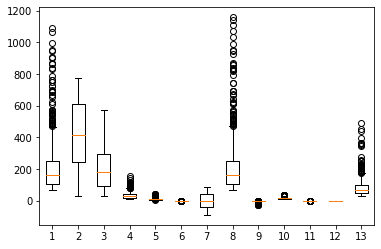

In [12]:
# Find the units/scale of features
fig, axs = plt.subplots()
axs.boxplot(X)
plt.show()

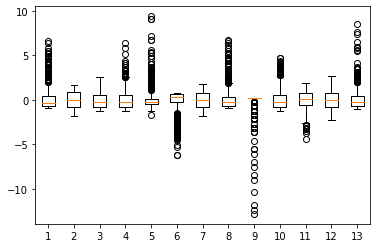

In [13]:
# As the features are in different units it is necessary to Standardize the features
sc = StandardScaler()
X_std = sc.fit_transform(X)
pd.DataFrame(X_std).head()

# Plot new features
fig, axs = plt.subplots()
axs.boxplot(X_std)
plt.show()


**Data Partitioning**


```
The data is split into Training and Testing data
Training data : 80% (973)
Testing data : 20% (244)
```




In [14]:
#Split the data into Training and Testing set
#Seed is fixed so that the splitting should be same each time
np.random.seed(45)
X_train,X_test,y_train,y_test = train_test_split(X_std,y_en,test_size=0.2,random_state=45)

# Shape of training set
X_train.shape,X_test.shape

((973, 13), (244, 13))

**Define Model**

In [15]:
# Model selection
model =Sequential()
# Add layers
model.add(Dense(9, input_dim=13, activation='relu'))
model.add(Dense(5, activation='relu'))
# Add softmax layer 
model.add(Dense(2, activation='softmax')) 

**Compile Model**

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Summerize**

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________


**Deciding the Hyperparameters - Epoch and Batch Size**

The model comes down to the lowest and stabalizes after 50 epochs

The accuracy touches its highest value and stabalizes after 50 epochs

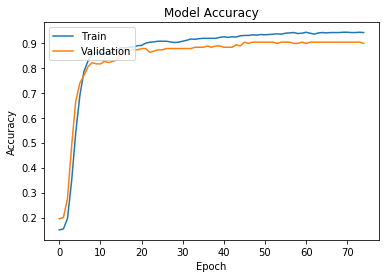

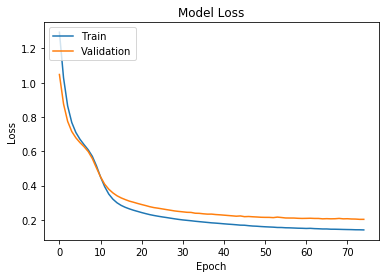

In [18]:
history = model.fit(X_train,y_train,validation_split=0.20,epochs=75,batch_size=32,verbose=0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Fitting the Model**

In [19]:
# From the above plots it looks like that the accuracy and model loss stabalizes around 50 epochs so we will fit the model with these hyper parameters
model.fit(X_train,y_train,validation_split=0.10,epochs=50,batch_size=32)

Train on 875 samples, validate on 98 samples
Epoch 1/50
875/875 [==============================] - 0s 123us/step - loss: 0.1510 - acc: 0.9383 - val_loss: 0.1748 - val_acc: 0.9082
Epoch 2/50
875/875 [==============================] - 0s 119us/step - loss: 0.1506 - acc: 0.9337 - val_loss: 0.1759 - val_acc: 0.9082
Epoch 3/50
875/875 [==============================] - 0s 105us/step - loss: 0.1497 - acc: 0.9371 - val_loss: 0.1761 - val_acc: 0.9082
Epoch 4/50
875/875 [==============================] - 0s 106us/step - loss: 0.1495 - acc: 0.9349 - val_loss: 0.1759 - val_acc: 0.9082
Epoch 5/50
875/875 [==============================] - 0s 106us/step - loss: 0.1492 - acc: 0.9349 - val_loss: 0.1754 - val_acc: 0.9082
Epoch 6/50
875/875 [==============================] - 0s 106us/step - loss: 0.1497 - acc: 0.9349 - val_loss: 0.1758 - val_acc: 0.9082
Epoch 7/50
875/875 [==============================] - 0s 105us/step - loss: 0.1485 - acc: 0.9349 - val_loss: 0.1754 - val_acc: 0.9082
Epoch 8/50
875/87

**Evaluate the Model**

In [20]:
# Evaluate the model on the Test dataset 
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

244/244 [==============================] - 0s 37us/step

loss: 20.82%

acc: 90.57%


In [21]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
pd.DataFrame(yhat_probs).head()

,0,1
0,0.999883,0.000117
1,0.999997,0.000003
2,0.999728,0.000272
3,0.999410,0.000590
4,0.990622,0.009378


In [22]:
# predict  classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
pd.DataFrame(yhat_classes).head()

,0
0,0
1,0
2,0
3,0
4,0


In [23]:
yhat_classes = yhat_classes.reshape(len(yhat_classes), 1)
yhat_classes = ohe.fit_transform(yhat_classes)
pd.DataFrame(yhat_classes).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


**1. What is the accuracy, Precision, and Recall for each class prediction?**
    


```
Overall Accuracy:  90.57377039409074
Overall Loss:  20.81918077634983

Class 0
Accuracy: 0.905738
Precision: 0.927184
Recall: 0.959799
F1 score: 0.943210

Class 1
Accuracy: 0.905738
Precision: 0.789474
Recall: 0.666667
F1 score: 0.722892

```

    



In [24]:
# Accuracy
print("Overall Accuracy: ", scores[1]*100)
# Loss
print("Overall Loss: ", scores[0]*100)

print()
# for class 0
print("Class 0")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test[:,0], yhat_classes[:,0])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test[:,0],  yhat_classes[:,0])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test[:,0],  yhat_classes[:,0])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test[:,0],  yhat_classes[:,0])
print('F1 score: %f' % f1)

print()
# for class 1
print("Class 1")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test[:,1], yhat_classes[:,1])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test[:,1],  yhat_classes[:,1])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test[:,1],  yhat_classes[:,1])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test[:,1],  yhat_classes[:,1])
print('F1 score: %f' % f1)
print()

# Precison, Recall and F-1 score
print(classification_report(y_test, yhat_classes))



Overall Accuracy:  90.57377039409074
Overall Loss:  20.81918077634983

Class 0
Accuracy: 0.905738
Precision: 0.927184
Recall: 0.959799
F1 score: 0.943210

Class 1
Accuracy: 0.905738
Precision: 0.789474
Recall: 0.666667
F1 score: 0.722892

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       199
           1       0.79      0.67      0.72        45

   micro avg       0.91      0.91      0.91       244
   macro avg       0.86      0.81      0.83       244
weighted avg       0.90      0.91      0.90       244
 samples avg       0.91      0.91      0.91       244



**2. Create an ROC curve plot for each class prediction.**


```
The ROC curve is convincing 
AUC Class 0: 0.958
AUC Class 1: 0.958

```



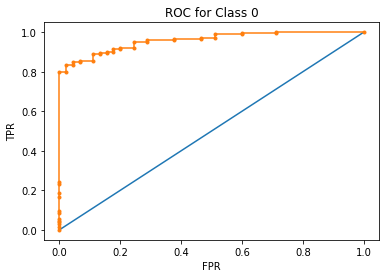

AUC Class 0: 0.958


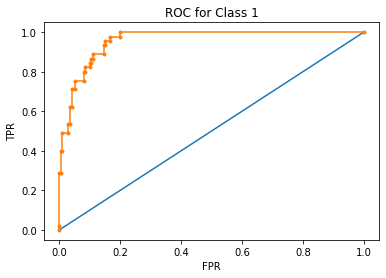

AUC Class 0: 0.958


In [25]:
# calculate roc curve

#Class 0
fpr_c0, tpr_c0, thresholds_c0 = roc_curve(y_test[:,0], yhat_probs[:,0])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='-')
# plot the roc curve for the model
plt.plot(fpr_c0, tpr_c0, marker='.')
plt.title('ROC for Class 0')
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the plot
plt.show()


# calculate AUC
auc_c0 = roc_auc_score(y_test[:,0], yhat_probs[:,0])
print('AUC Class 0: %.3f' % auc_c0)

#Class 1
fpr_c1, tpr_c1, thresholds_c1 = roc_curve(y_test[:,1], yhat_probs[:,1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='-')
# plot the roc curve for the model
plt.plot(fpr_c1, tpr_c1, marker='.')
plt.title('ROC for Class 1')
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the plot
plt.show()

# calculate AUC
auc_c1 = roc_auc_score(y_test[:,1], yhat_probs[:,1])
print('AUC Class 0: %.3f' % auc_c1)